# Thyroid Disease Analysis

## Anomalous Value Detection

This algorithm uses anomalous data detection to determine if any values deviate significantly from expected patterns. This method, using the Isolation Forest model, is of particular use to this example as it can indicate risk factors for thyroid disease in humans when applied to a sufficient dataset.

#### Importing toolkits

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Importing and transforming data 

- Reading in the data
- Removing missing values
- Converting categorical variables to numerical

In [19]:
data = pd.read_csv("Data\\thyroid_dataset.csv")

data.dropna(inplace=True)

data = pd.get_dummies(data)

print(data.columns)

Index(['Age', 'Sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3_measured',
       'TT4_measured', 'T4U_measured', 'FTI_measured', 'Outlier_label _n',
       'Outlier_label _o'],
      dtype='object')


#### Preparing for Training/Testing

- Normalizing numeric features
- Splitting dataset into training and testing portions

In [16]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

#### Train Isolation Forest Model

In [17]:
model = IsolationForest(contamination=0.05)  # Adjust the contamination parameter
model.fit(X_train)

IsolationForest(contamination=0.05)

#### Anomaly Prediction

The model predicts anomalies in the test dataset

 - Anomalies are detected as -1, normal data as 1

In [18]:
anomalies = model.predict(X_test)

anomaly_indices = np.where(anomalies == -1)[0]
anomalous_samples = X_test[anomaly_indices]

#### Plotting

Anomalous datapoints depicted in red


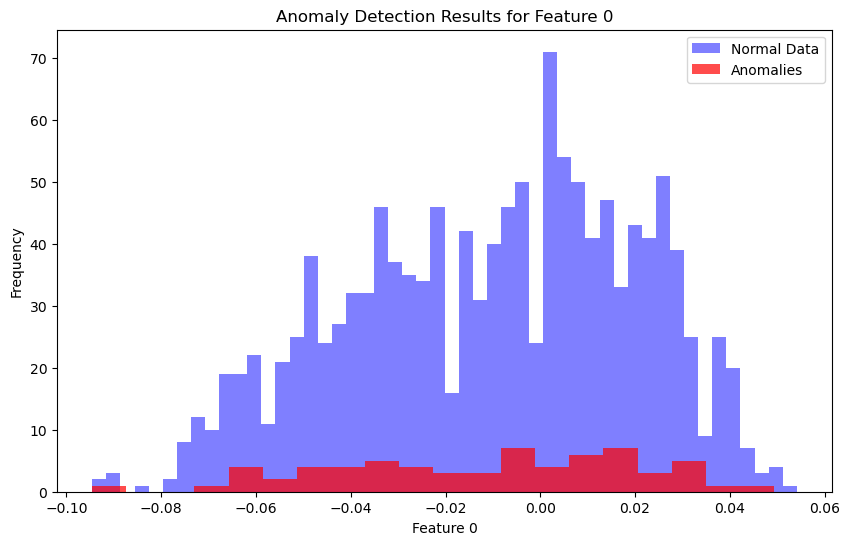

In [26]:
feature_index = 0

# Get the values of the selected feature for normal and anomalous data
feature_values_normal = X_test[:, feature_index][anomalies == 1]
feature_values_anomalies = X_test[:, feature_index][anomalies == -1]

# Create a histogram to visualize the distribution of the selected feature
plt.figure(figsize=(10, 6))
plt.hist(feature_values_normal, bins=50, color='blue', alpha=0.5, label='Normal Data')
plt.hist(feature_values_anomalies, bins=20, color='red', alpha=0.7, label='Anomalies')
plt.title('Anomaly Detection Results for Feature {}'.format(feature_index))
plt.xlabel('Feature {}'.format(feature_index))
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [21]:
anomalies = model.predict(X_test)

# Get the indices of anomalous data points
anomaly_indices = np.where(anomalies == -1)[0]

# Access and print the anomalous data points
anomalous_data = X_test[anomaly_indices]

# Convert the anomalous data to a DataFrame for better readability
anomalous_data_df = pd.DataFrame(anomalous_data, columns=data.columns)

# Print the anomalous data
print("Anomalous Data:")
print(anomalous_data_df)

Anomalous Data:
         Age       Sex  on_thyroxine  query_on_thyroxine  \
0   0.021798 -0.666440     -0.394405           -0.125951   
1   0.005640 -0.666440     -0.394405           -0.125951   
2  -0.041219 -0.666440     -0.394405           -0.125951   
3   0.005640 -0.666440     -0.394405            7.939587   
4   0.005640 -0.666440     -0.394405            7.939587   
..       ...       ...           ...                 ...   
60  0.000792  1.500509      2.535463           -0.125951   
61  0.049266 -0.666440     -0.394405            7.939587   
62  0.034724 -0.666440     -0.394405           -0.125951   
63  0.029877 -0.666440     -0.394405           -0.125951   
64 -0.049298  1.500509      2.535463           -0.125951   

    on_antithyroid_medication      sick  pregnant  thyroid_surgery  \
0                    -0.11547 -0.199609 -0.106803        -0.120509   
1                    -0.11547  5.009802 -0.106803        -0.120509   
2                    -0.11547 -0.199609  9.363048    